In [65]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from pathlib import Path
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [67]:
from dataset import LaserDataset
from transform import *

In [68]:
from model_torch import ShallowNet

In [69]:
from train import ShallowNet_Loss, train_ShallowNet

In [70]:
from model_torch import UNet11

In [71]:
import torch
from torch import optim

In [72]:
transform_train = _Compose([
#                         _RandomApply([
#                             _Resize(scale_range=(0.5, 1.5), raw=RAW_IMAGE_SIZE),
#                         ], p=0.99),
#                         _RandomCrop(MODEL_INPUT_SIZE, MODEL_INPUT_SIZE, padding_mode='symmetric'),
                        _RandomRotation(0.999, 360),
                        _ColorJitter(brightness=0.2, contrast=0.3, saturation=0.2, hue=0.02),
                        _RandomHorizontalFlip(0.5),
                        _RandomVerticalFlip(0.5),
#                         _RandomGrayscale(0.01),
                        _Lambda(lambda x, y: (_ToTensor()(x), _ToTensor()(y)))
                ])
laser_dataset = LaserDataset('laser/train', train=True, class_nums=2, transform=transform_train, fitting_one_image_index=-1)
laser_loader = torch.utils.data.DataLoader(laser_dataset,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=8)

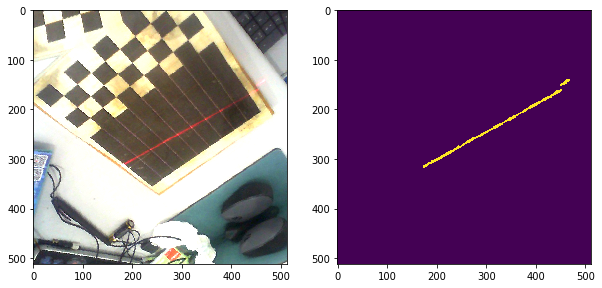

In [73]:
x, y = laser_dataset[2]
plt.figure(figsize=[10, 10])
plt.subplot(121)
plt.imshow(x.permute(1, 2, 0))
plt.subplot(122)
plt.imshow(y[0])

In [53]:
t1 = np.diag(np.ones(11))
print(t1)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [58]:
t2 = np.flip(np.diag(np.ones((11))), axis=1)
print(t2)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [59]:
t3 = np.zeros((11, 11))
t3[5, :] = 1
print(t3)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [60]:
t4= np.zeros((11, 11))
t4[:, 5] = 1
print(t4)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [49]:
x1 = t1.reshape(1, -1)
x2 = t1.reshape(-1, 1)
np.matmul(x1, x2)

array([[ 10.]])

In [50]:
x1 = t2.reshape(1, -1)
x2 = t2.reshape(-1, 1)
np.matmul(x1, x2)

array([[ 10.]])

In [61]:
x1 = t3.reshape(1, -1)
x2 = t3.reshape(-1, 1)
np.matmul(x1, x2)

array([[ 11.]])

In [62]:
x1 = t4.reshape(1, -1)
x2 = t4.reshape(-1, 1)
np.matmul(x1, x2)

array([[ 11.]])

In [19]:
train_config = {
    'epochs':1, 
    'is_cuda_type': True,
    'print_log_every_step': 30,
    'learning_rate': 1e-3,
    'decay_learning_rate_at_epcho': [3000, 4000]
}

In [11]:
log = {
    'loss': []
}

In [12]:
# model = torch.load('laser_model_one_conv.pth')

In [74]:
model = ShallowNet()
model = model.cuda()

In [75]:
model.conv1.weight.shape

torch.Size([4, 3, 9, 9])

In [27]:
# model = UNet11(1).cuda()

In [13]:
loss_fn = ShallowNet_Loss()
optimizer = optim.Adam(params=model.parameters(), lr=1e-4)

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 210.099029541,
kernel 0, max val 0.074260, min val -0.059668
kernel 1, max val 0.074976, min val -0.063739
kernel 2, max val 0.081504, min val -0.054946
kernel 3, max val 0.079232, min val -0.058119


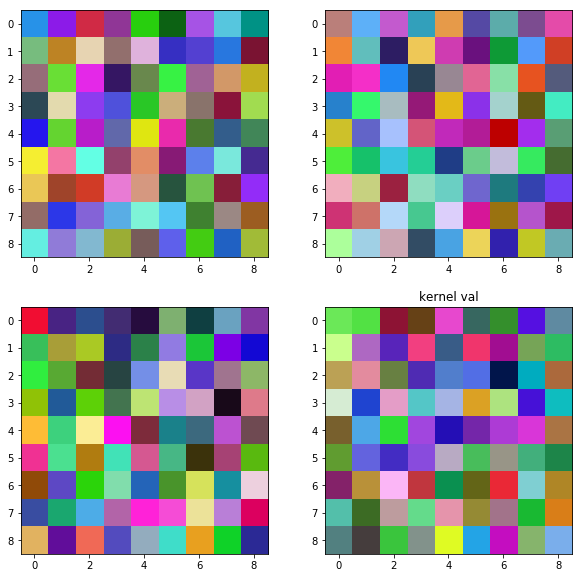

kernel 0, max grad2.246590, min grad-1.054041
kernel 1, max grad0.271565, min grad-0.278727
kernel 2, max grad0.000595, min grad-0.001722
kernel 3, max grad0.037578, min grad-0.116526


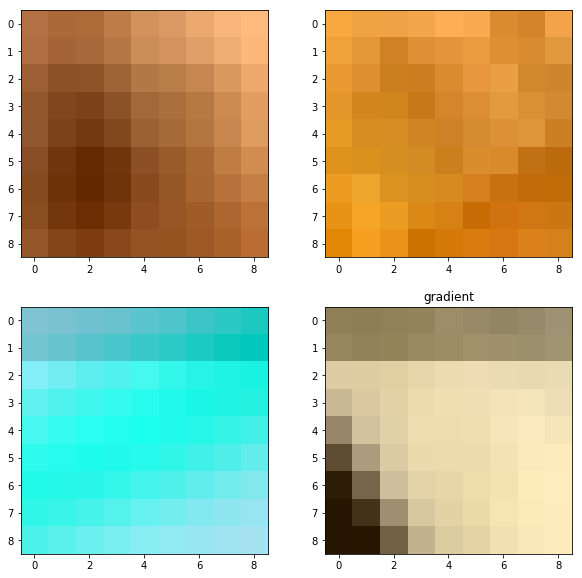

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 197.740341187,
kernel 0, max val 0.074806, min val -0.060049
kernel 1, max val 0.075156, min val -0.063838
kernel 2, max val 0.081898, min val -0.055210
kernel 3, max val 0.079283, min val -0.058194


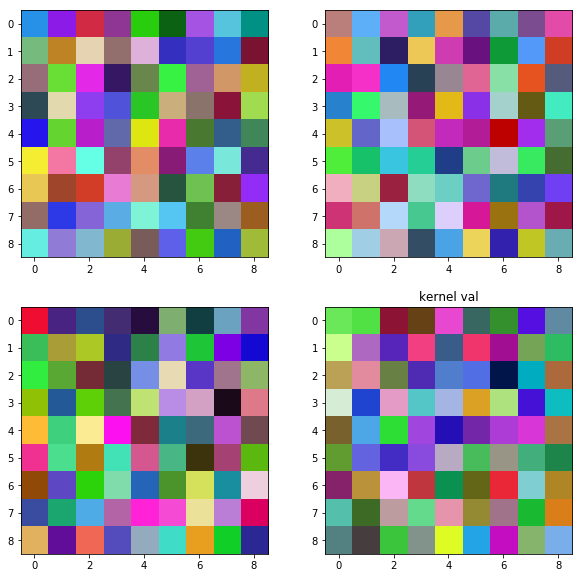

kernel 0, max grad1.300834, min grad-0.769485
kernel 1, max grad0.183964, min grad-0.189316
kernel 2, max grad0.000306, min grad-0.001329
kernel 3, max grad0.035488, min grad-0.108815


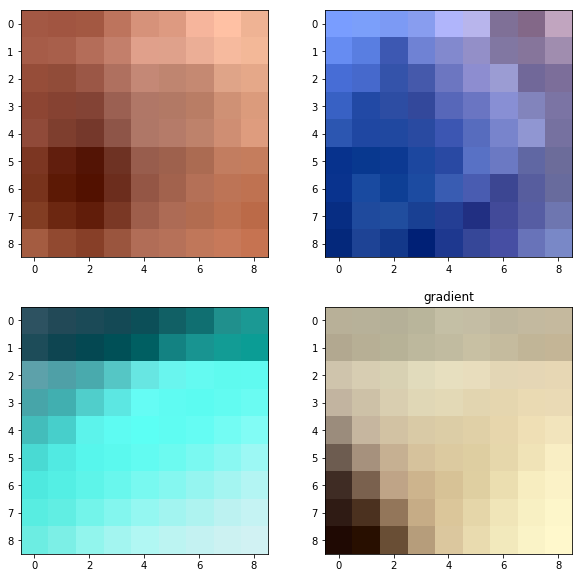

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 178.895858765,
kernel 0, max val 0.075323, min val -0.060446
kernel 1, max val 0.075494, min val -0.064242
kernel 2, max val 0.082125, min val -0.055325
kernel 3, max val 0.079312, min val -0.058303


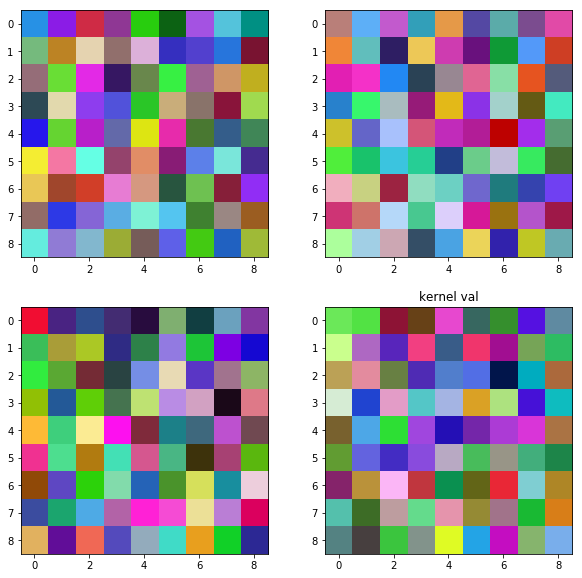

kernel 0, max grad1.609303, min grad-1.043749
kernel 1, max grad0.262930, min grad-0.304310
kernel 2, max grad0.000037, min grad-0.000070
kernel 3, max grad0.017375, min grad-0.054293


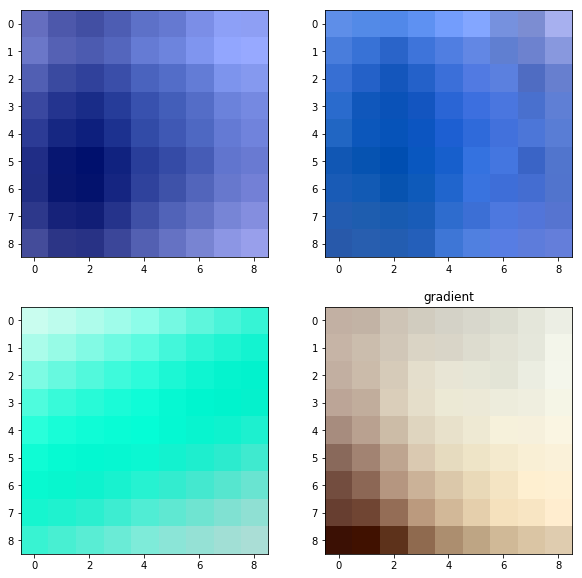

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 176.827484131,
kernel 0, max val 0.075888, min val -0.060714
kernel 1, max val 0.075837, min val -0.064604
kernel 2, max val 0.082325, min val -0.055518
kernel 3, max val 0.079322, min val -0.058377


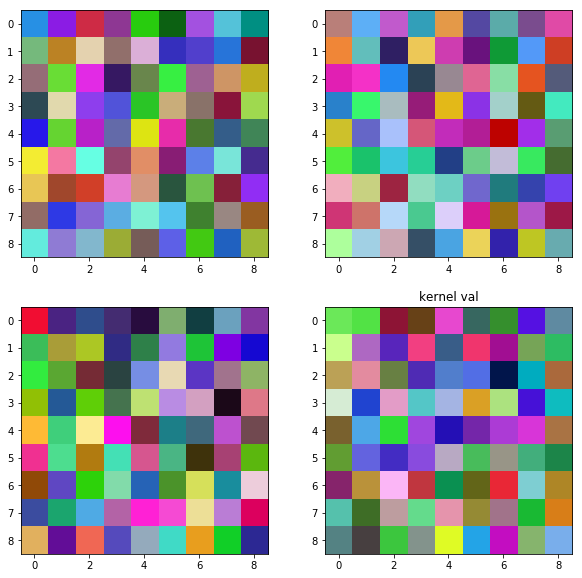

kernel 0, max grad1.508525, min grad-1.178259
kernel 1, max grad0.255829, min grad-0.170826
kernel 2, max grad0.001141, min grad-0.002863
kernel 3, max grad0.028666, min grad-0.123792


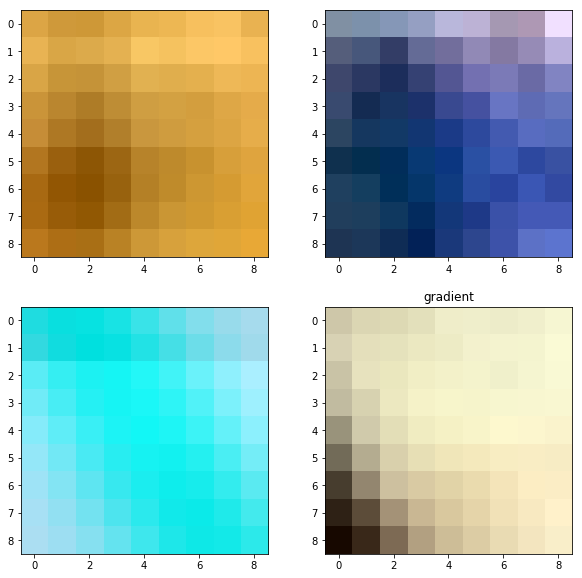

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 159.773010254,
kernel 0, max val 0.076507, min val -0.061103
kernel 1, max val 0.076188, min val -0.065051
kernel 2, max val 0.082902, min val -0.056302
kernel 3, max val 0.079316, min val -0.058442


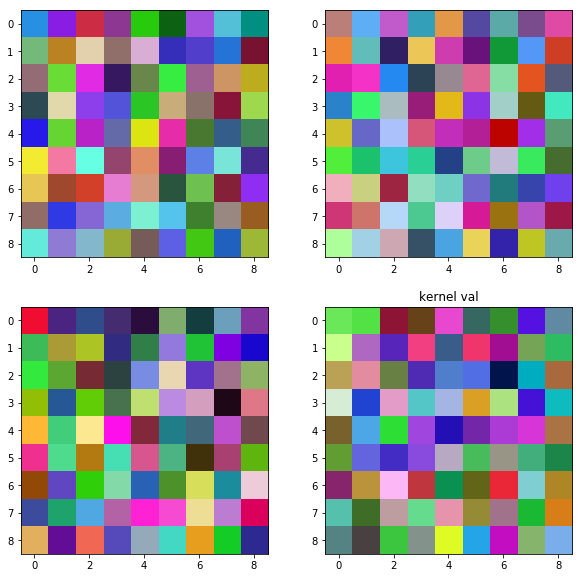

kernel 0, max grad1.337632, min grad-0.706186
kernel 1, max grad0.667523, min grad-0.486015
kernel 2, max grad0.001479, min grad-0.003106
kernel 3, max grad0.006240, min grad-0.017619


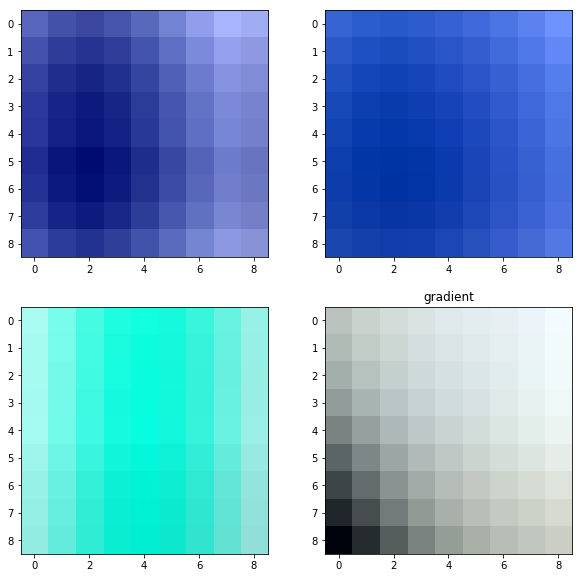

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 171.875625610,
kernel 0, max val 0.077118, min val -0.061523
kernel 1, max val 0.076570, min val -0.065603
kernel 2, max val 0.083791, min val -0.057427
kernel 3, max val 0.079304, min val -0.058504


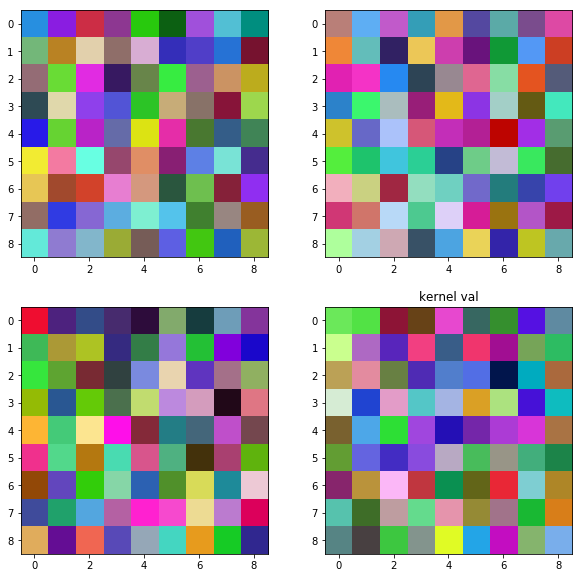

kernel 0, max grad1.210346, min grad-0.949006
kernel 1, max grad0.099085, min grad-0.075553
kernel 2, max grad0.002097, min grad-0.003784
kernel 3, max grad0.011281, min grad-0.060177


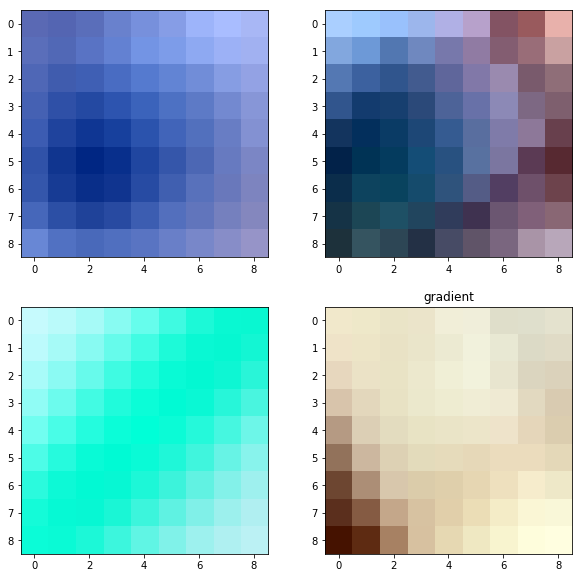

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 157.355194092,
kernel 0, max val 0.077730, min val -0.061906
kernel 1, max val 0.076963, min val -0.066143
kernel 2, max val 0.084622, min val -0.058446
kernel 3, max val 0.079288, min val -0.058567


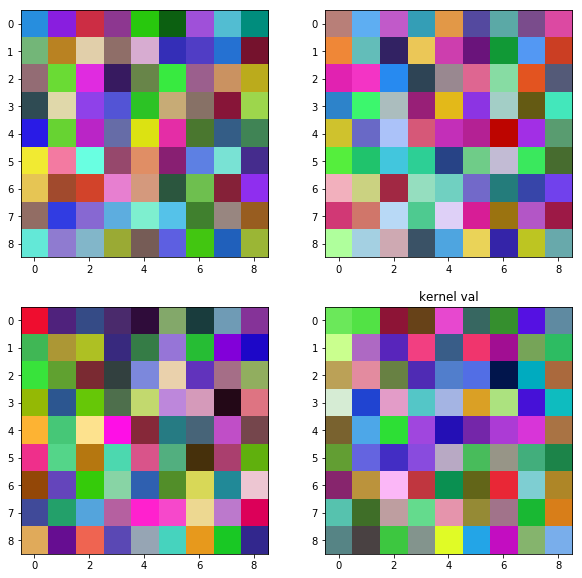

kernel 0, max grad1.093967, min grad-0.780765
kernel 1, max grad0.198523, min grad-0.095559
kernel 2, max grad0.001358, min grad-0.002139
kernel 3, max grad0.019917, min grad-0.078207


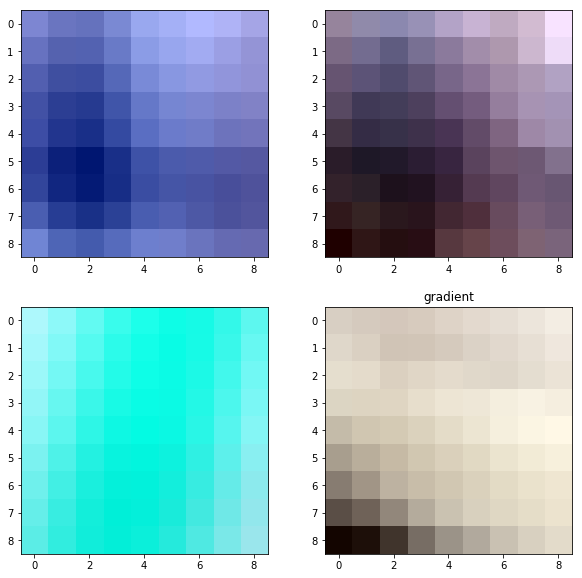

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 128.504470825,
kernel 0, max val 0.078358, min val -0.062374
kernel 1, max val 0.077389, min val -0.066677
kernel 2, max val 0.085584, min val -0.059664
kernel 3, max val 0.079270, min val -0.058627


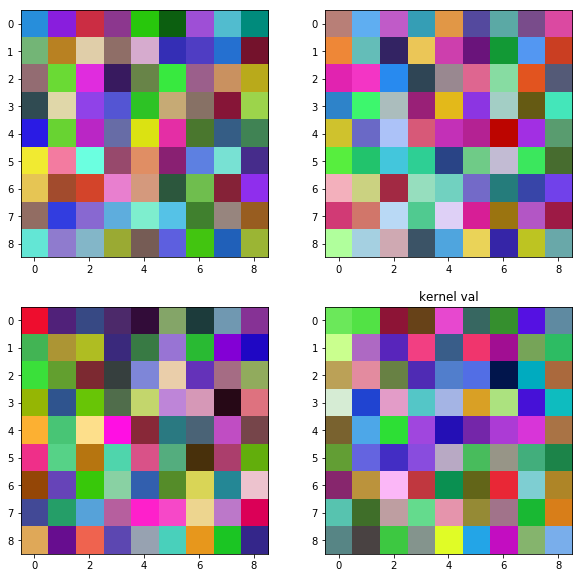

kernel 0, max grad0.421569, min grad-0.433113
kernel 1, max grad0.115779, min grad-0.061409
kernel 2, max grad0.001160, min grad-0.000950
kernel 3, max grad0.006627, min grad-0.046791


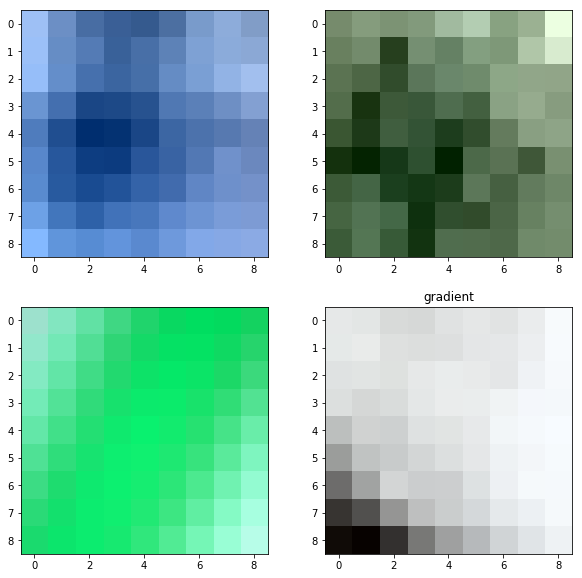

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 99.446685791,
kernel 0, max val 0.078906, min val -0.062749
kernel 1, max val 0.077906, min val -0.067427
kernel 2, max val 0.086465, min val -0.060852
kernel 3, max val 0.079255, min val -0.058670


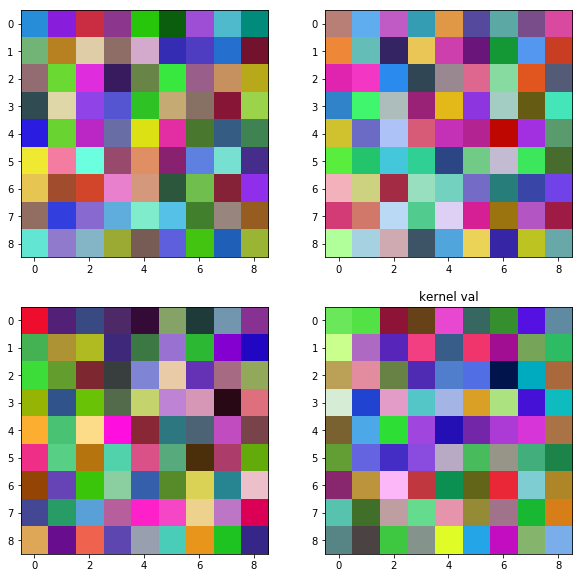

kernel 0, max grad1.946279, min grad-1.054193
kernel 1, max grad0.112445, min grad-0.054873
kernel 2, max grad0.001811, min grad-0.002002
kernel 3, max grad0.001412, min grad-0.003304


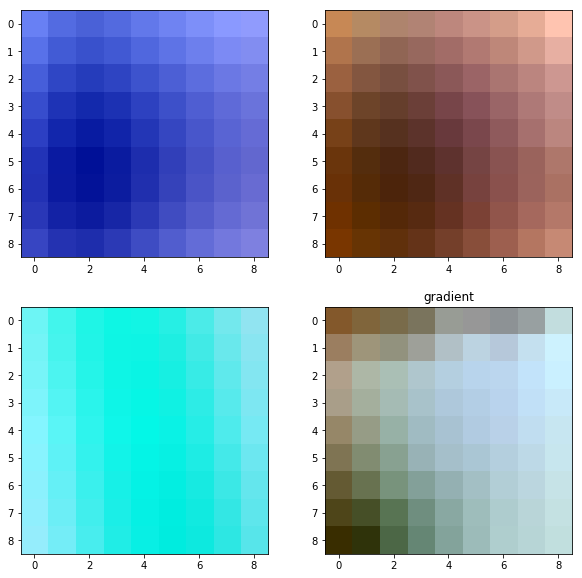

learning_rate:  0.001
Starting epoch 1 / 1
lr=0.001000000, t = 1, loss = 73.617668152,
kernel 0, max val 0.079531, min val -0.063247
kernel 1, max val 0.078367, min val -0.068193
kernel 2, max val 0.087230, min val -0.062050
kernel 3, max val 0.079246, min val -0.058701


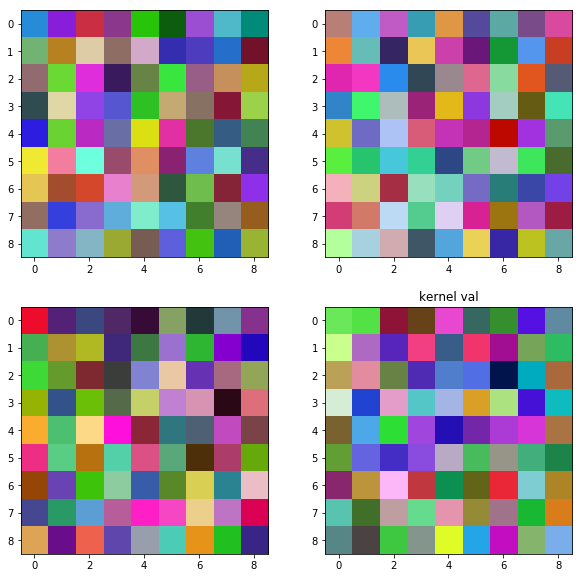

kernel 0, max grad0.673265, min grad-0.446126
kernel 1, max grad0.042997, min grad-0.046346
kernel 2, max grad0.000852, min grad-0.000580
kernel 3, max grad0.006767, min grad-0.076342


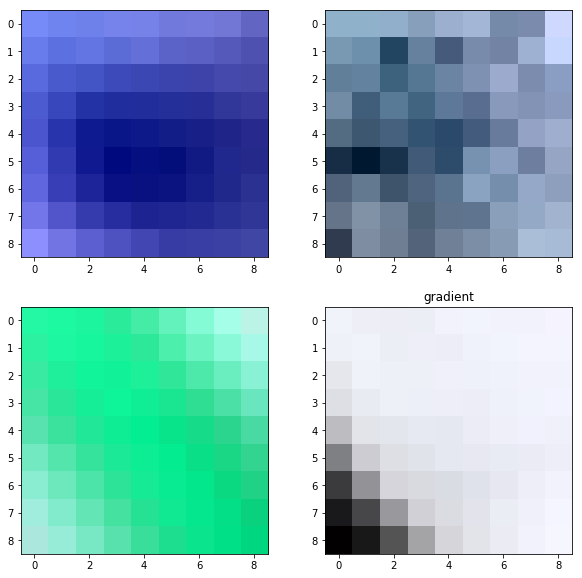

In [20]:
for i in range(10):
    train_ShallowNet(model, loss_fn, optimizer, laser_loader, log, **train_config)
    show_model_conv1(model, 4)

In [19]:
weight = torch.Tensor([1, 1])
pos_weight = torch.Tensor([4])
f = torch.nn.BCEWithLogitsLoss(weight=weight, pos_weight=pos_weight)
f(torch.Tensor([-100, -100]), torch.Tensor([0., 1.]))

tensor(200.)

In [57]:
torch.Tensor([[1, 0.]]).shape

torch.Size([1, 2])

In [1]:
show_model_conv1(model, 4)

NameError: name 'show_model_conv1' is not defined

kernel 0, max val 0.903608, min val -0.612573
kernel 1, max val 0.747566, min val -0.718525
kernel 2, max val 0.485952, min val -0.836931
kernel 3, max val 1.025641, min val -0.505237


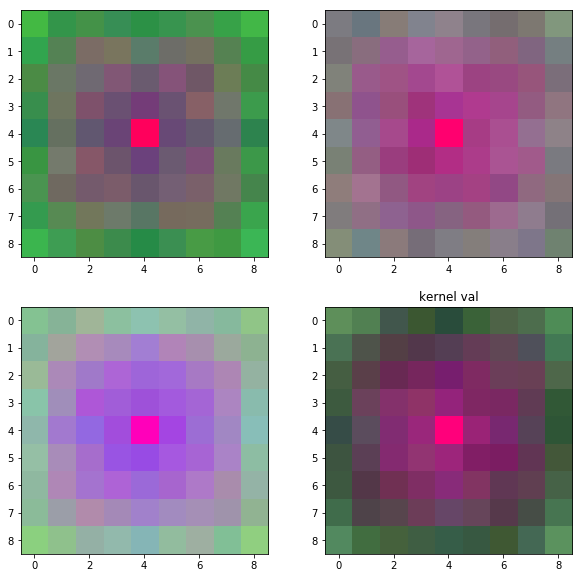

kernel 0, max grad0.228943, min grad0.131373
kernel 1, max grad0.418218, min grad0.241460
kernel 2, max grad0.305410, min grad0.137461
kernel 3, max grad0.541934, min grad0.319938


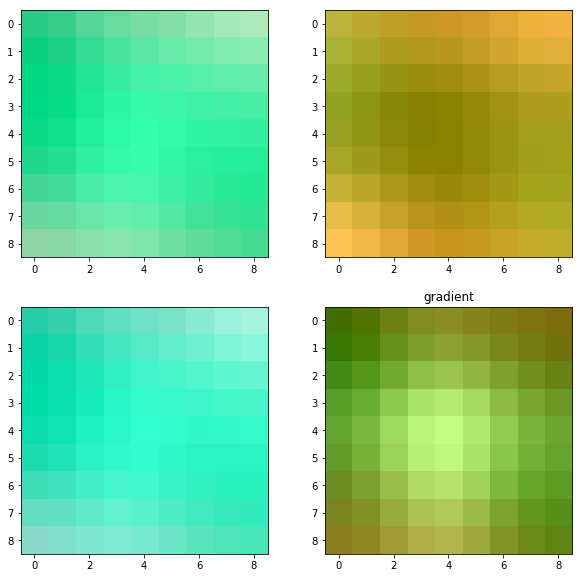

In [47]:
show_model_conv1(model, 4)

In [53]:
torch.save(model, 'model_4_kernel_well.pth')

PicklingError: Can't pickle <class 'model_torch.ShallowNet'>: it's not the same object as model_torch.ShallowNet

kernel 0, max val 0.136545, min val -0.115279
kernel 1, max val 0.163317, min val -0.183820
kernel 2, max val 0.180148, min val -0.209225
kernel 3, max val 0.235020, min val -0.325819


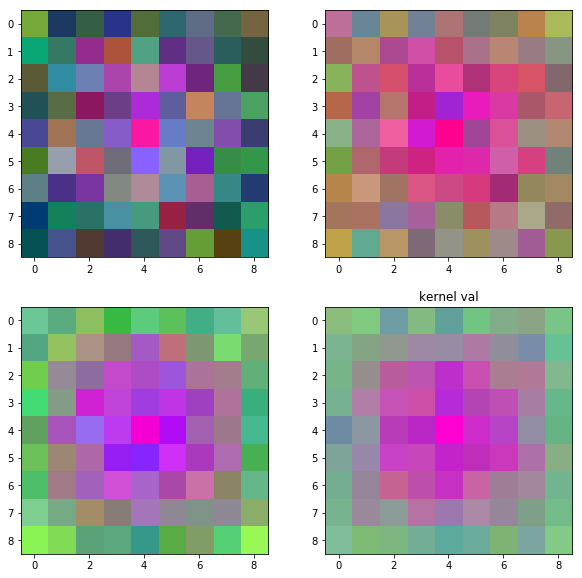

kernel 0, max grad0.208466, min grad-0.084782
kernel 1, max grad0.172175, min grad-0.115841
kernel 2, max grad0.065648, min grad-0.568412
kernel 3, max grad0.475018, min grad-0.404520


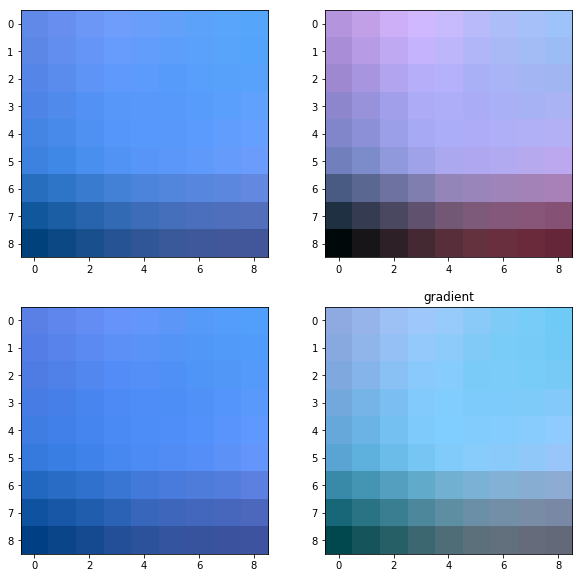

In [39]:
show_model_conv1(model, 4)

In [17]:
def show_model_conv1(model, indexs=1):
    plt.figure(figsize=[10, 10])
    for i in range(0, indexs):
        plt.subplot(2, 2, i+1)
        w_np = model.conv1.weight[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy()
        print('kernel %d, max val %f, min val %f' % (i, w_np.max(), w_np.min()))
        w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
        plt.imshow(w_norm)
    plt.title('kernel val')
    plt.show()
    
    plt.figure(figsize=[10, 10])
    for i in range(0, indexs):
        plt.subplot(2, 2, i+1)
        w_np = model.conv1.weight.grad[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy()
        print('kernel %d, max grad%f, min grad%f' % (i, w_np.max(), w_np.min()))
        w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
        plt.imshow(w_norm)
    plt.title('gradient')
    plt.show()

0.0695263 0.0172827


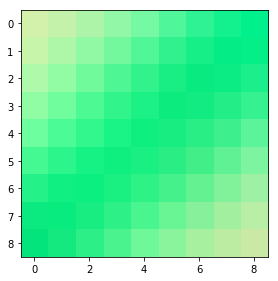

In [108]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv1.weight.grad[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy()
    print(w_np.max(), w_np.min())
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

-0.0156096 -0.0169474


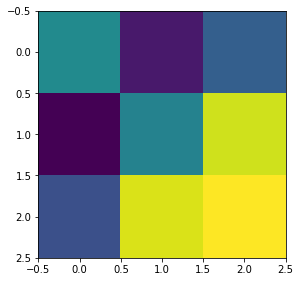

In [44]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv2.weight.grad[0, i, :, :].detach().cpu().numpy()
    print(w_np.max(), w_np.min())
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

-0.00746717 -0.0221963


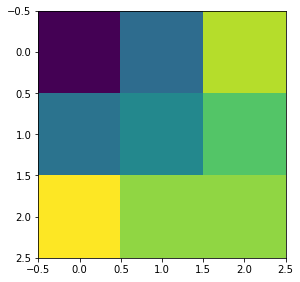

In [74]:
plt.figure(figsize=[10, 10])
for i in range(0, 1):
    plt.subplot(2, 2, i+1)
    w_np = model.conv3.weight.grad[0, i, :, :].detach().cpu().numpy()
    print(w_np.max(), w_np.min())
    w_norm = (w_np-w_np.min())/(w_np.max()-w_np.min())
    plt.imshow(w_norm)

In [30]:
transform_valid = _Compose([
#                         _RandomApply([
#                             _Resize(scale_range=(0.5, 1.5), raw=RAW_IMAGE_SIZE),
#                         ], p=0.99),
#                         _RandomCrop(MODEL_INPUT_SIZE, MODEL_INPUT_SIZE, padding_mode='symmetric'),
                        _RandomRotation(0.999, 360),
                        _ColorJitter(brightness=0.2, contrast=0.3, saturation=0.2, hue=0.02),
                        _RandomHorizontalFlip(0.5),
                        _RandomVerticalFlip(0.5),
#                         _RandomGrayscale(0.01),
                        _Lambda(lambda x, y: (_ToTensor()(x), _ToTensor()(y)))
                ])
laser_dataset_valid = LaserDataset('laser/train', train=True, class_nums=2, transform=transform_valid)
laser_loader_valid = torch.utils.data.DataLoader(laser_dataset_valid,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=8)

0.9990473389625549 0.00022059204638935626


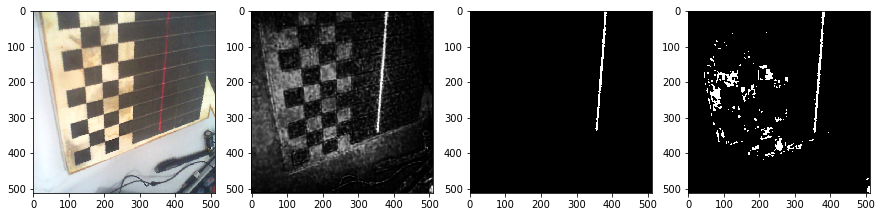

0.9918782711029053 0.00013400665193330497


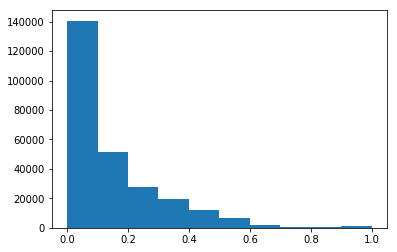

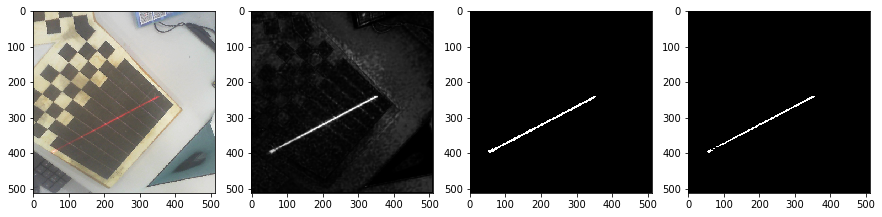

0.9904242157936096 1.4762305909243878e-05


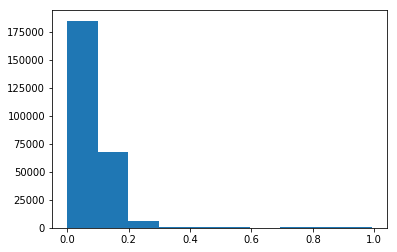

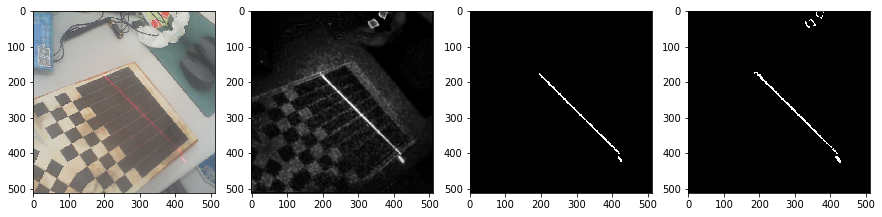

0.997530996799469 5.3845647926209494e-05


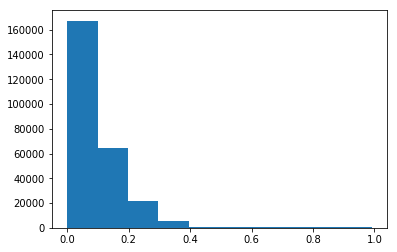

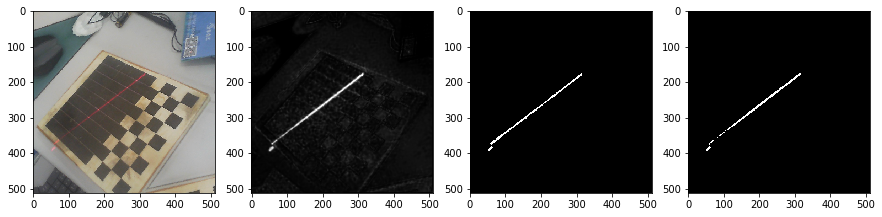

0.9911326766014099 5.2364954171935096e-05


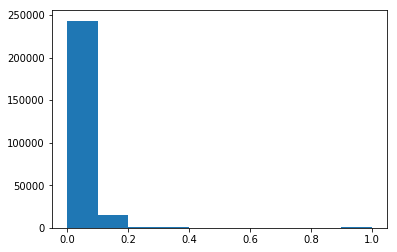

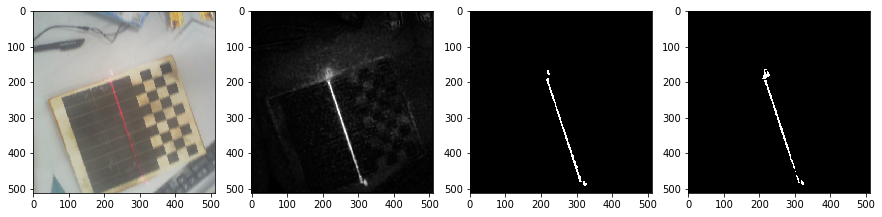

0.9991200566291809 6.892795681778807e-06


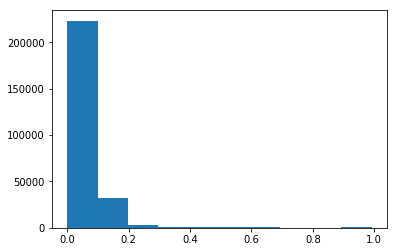

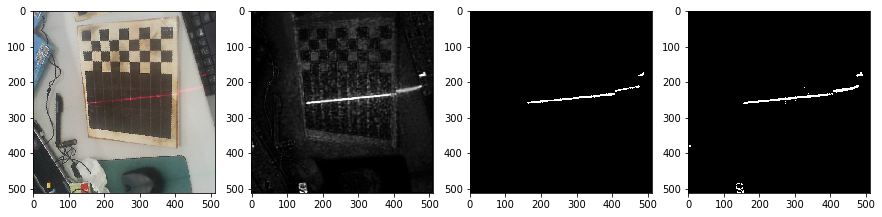

0.9674835801124573 5.9337729396702343e-08


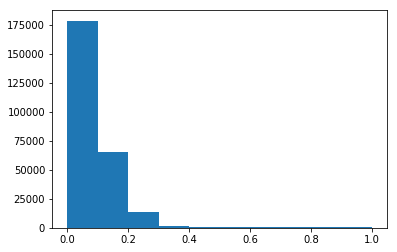

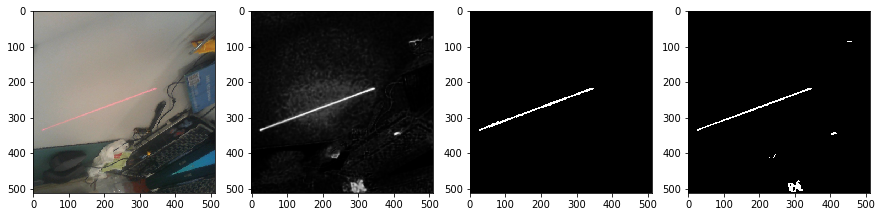

0.9986264705657959 1.1798598279710859e-05


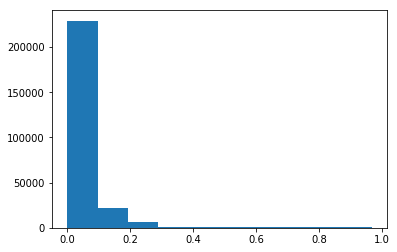

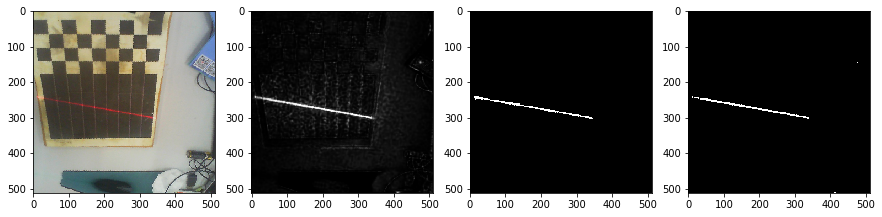

0.9860461354255676 8.005983545444906e-05


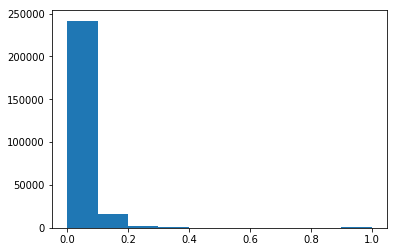

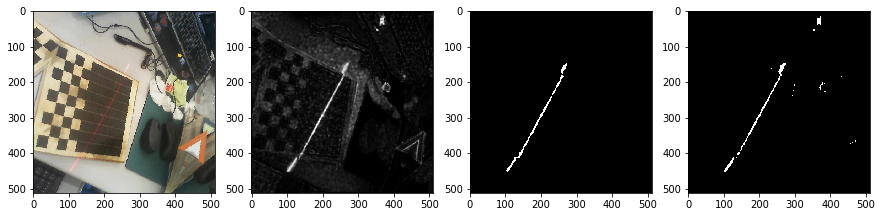

0.9905263185501099 0.00044291920494288206


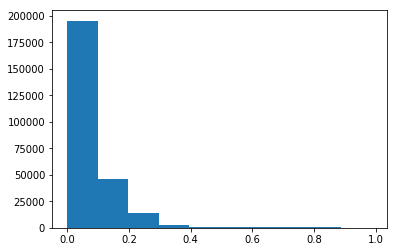

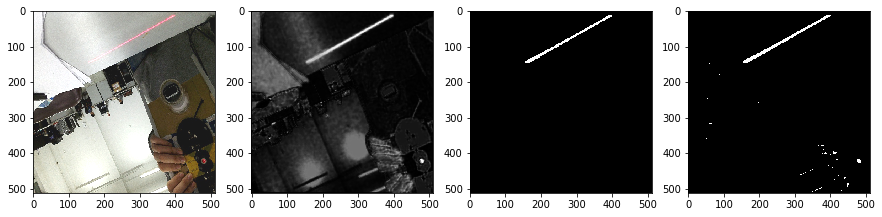

0.9984276294708252 7.552453098469414e-06


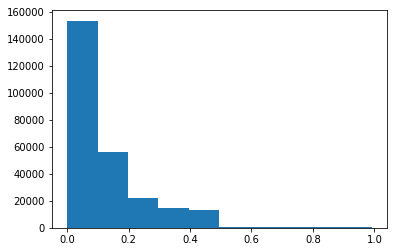

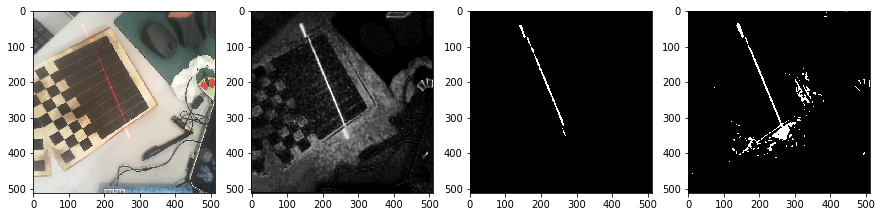

0.9751942157745361 0.00022966956021264195


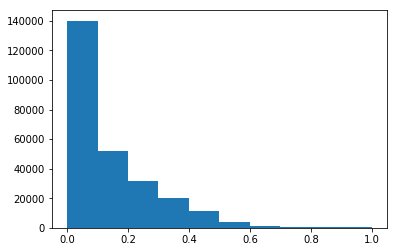

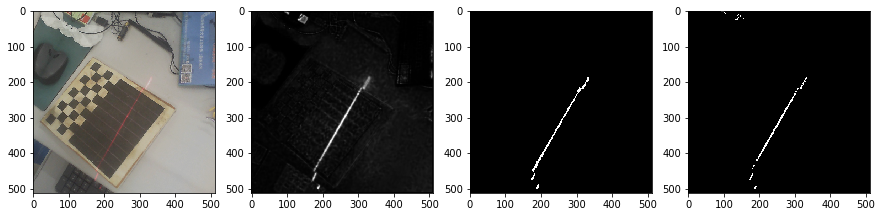

0.9968262910842896 5.673532996297581e-06


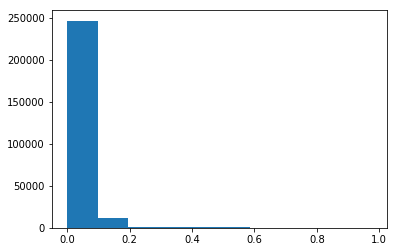

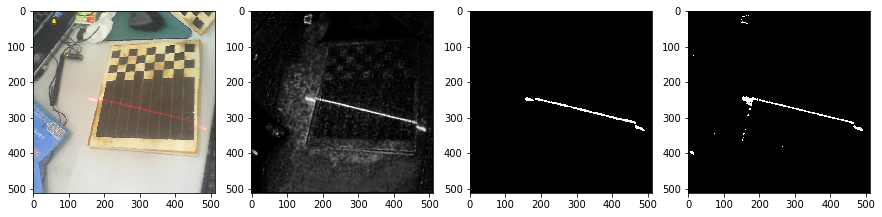

In [ ]:
model.eval()
for x, y in laser_loader_valid:
    if train_config['is_cuda_type']:
        x = x.cuda()
    out = model(x)
    out_np = torch.sigmoid(out).squeeze(0).squeeze(0).cpu().detach().numpy()
    print(out_np.max().item(), out_np.min().item())
    out_bi = out_np > 0.5
    y_np = torch.sigmoid(y).squeeze(0).squeeze(0).cpu().detach().numpy()
    
    plt.figure(figsize=[15, 5])
    plt.subplot(141)
    plt.imshow(x.squeeze(0).cpu().detach().permute(1, 2, 0).numpy())
    plt.subplot(142)
    plt.imshow(out_np, 'gray')
    plt.subplot(143)
    plt.imshow(y_np, 'gray')
    plt.subplot(144)
    plt.imshow(out_bi, 'gray')
    plt.show()
    plt.figure()
    plt.hist(out_np.reshape(-1))

In [50]:
torch.save(model, 'laser_model_one_conv.pth')

PicklingError: Can't pickle <class 'model_torch.ShallowNet'>: it's not the same object as model_torch.ShallowNet

In [55]:
%timeit out = model(x)

27.1 ms ± 2.87 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
1000/30

33.333333333333336

In [56]:
torch.save(model, 'laser_model.pth')

In [95]:
torch.nn.ELU()(torch.arange(-10, 10, dtype=torch.float))

tensor([-1.0000, -0.9999, -0.9997, -0.9991, -0.9975, -0.9933, -0.9817, -0.9502,
        -0.8647, -0.6321,  0.0000,  1.0000,  2.0000,  3.0000,  4.0000,  5.0000,
         6.0000,  7.0000,  8.0000,  9.0000])

In [112]:
for i in range(0, 4):
    print('----')
    print('min', model.conv1.weight[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy().min())
    print('max', model.conv1.weight[i, :, :, :].detach().cpu().permute(1, 2, 0).numpy().max())

----
min -0.0637123
max 0.0637147
----
min -0.0641065
max 0.0637025
----
min -0.0640966
max 0.0640039
----
min -0.0630816
max 0.063639


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


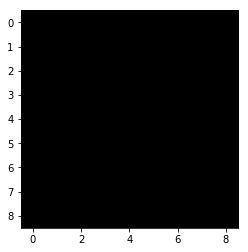

In [23]:
plt.imshow()

In [55]:
y.shape

torch.Size([1, 1, 480, 640])

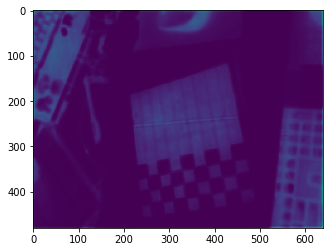

In [23]:
plt.imshow(out_np)

In [68]:
out.shape

torch.Size([1, 1, 480, 640])

In [69]:
out.max()

tensor(-1.1207, device='cuda:0', grad_fn=<MaxBackward1>)

In [70]:
out.min()

tensor(-10.8760, device='cuda:0', grad_fn=<MinBackward1>)

In [28]:
model.conv1.weight[0, 0, :, :].max()

tensor(0.0920, device='cuda:0', grad_fn=<MaxBackward1>)

In [29]:
model.conv1.weight[0, 0, :, :].min()

tensor(-0.0338, device='cuda:0', grad_fn=<MinBackward1>)

In [59]:
model.conv1.weight.grad.shape

torch.Size([4, 3, 9, 9])

In [3]:
def show_log(log, lis=None):
    if lis is not None:
        for key in lis:
            log_ = {}
            log_[key] = log[key]
    else:
        log_ = log
#     plt.figure(figsize=[8, 8])
    for k, v in log_.items():
        plt.plot(v)
#     plt.ylim([0, 2])
    plt.legend([k for k, v in log_.items()])
    plt.show()

In [4]:
show_log(log, ['loss'])

NameError: name 'log' is not defined

In [162]:
model

ShallowNet(
  (conv1): Conv2d(3, 1, kernel_size=(9, 9), stride=(1, 1), padding=(4.0, 4.0), bias=False)
)

In [139]:
plt.imshow(y[1])

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
np.meshgrid

In [13]:
f_path = './laser/label'
fn = os.listdir(f_path)[0]

In [19]:
img = cv2.imread(f_path+'/'+fn)

In [28]:
img[:, :, 2].min()

0

In [20]:
img.shape

(480, 640, 3)

In [3]:
p = Path('.')